In [12]:
import pandas as pd
import numpy as np
import re
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [13]:
# Ensure necessary NLTK resources are available
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

###1. Data Loading

In [14]:
data_path = '/content/sentimentdataset.csv'
df = pd.read_csv(data_path)

In [15]:
# Display the first few rows of the dataset to understand its structure
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


### 2. Preprocessing

In [16]:
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions (e.g., @username)
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (you can keep them if you want to analyze them)
    text = re.sub(r'#\w+', '', text)
    # Remove non-alphabetical characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenization and remove stopwords
    words = text.split()
    stopwords = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in words if word not in stopwords]
    return ' '.join(words)

In [17]:
# Apply preprocessing to each tweet/post in the 'text' column
df['cleaned_text'] = df['Text'].apply(preprocess_text)

### 3. Sentiment Analysis using TextBlob

In [18]:
def get_sentiment(text):
    analysis = TextBlob(text)
    # Sentiment polarity ranges from -1 (negative) to 1 (positive)
    return analysis.sentiment.polarity

In [19]:
# Apply sentiment analysis to each cleaned tweet/post
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

### 4. Time-based Sentiment Analysis

In [21]:
# Convert the 'created_at' column to datetime format (if not already in datetime format)
df['created_at'] = pd.to_datetime(df['Timestamp'])

In [22]:
# Optionally, extract date or hour for trend analysis
df['date'] = df['created_at'].dt.date
df['hour'] = df['created_at'].dt.hour

# 5. Visualizing Sentiment Trends

In [23]:
# Average sentiment per day
sentiment_by_day = df.groupby('date')['sentiment'].mean()

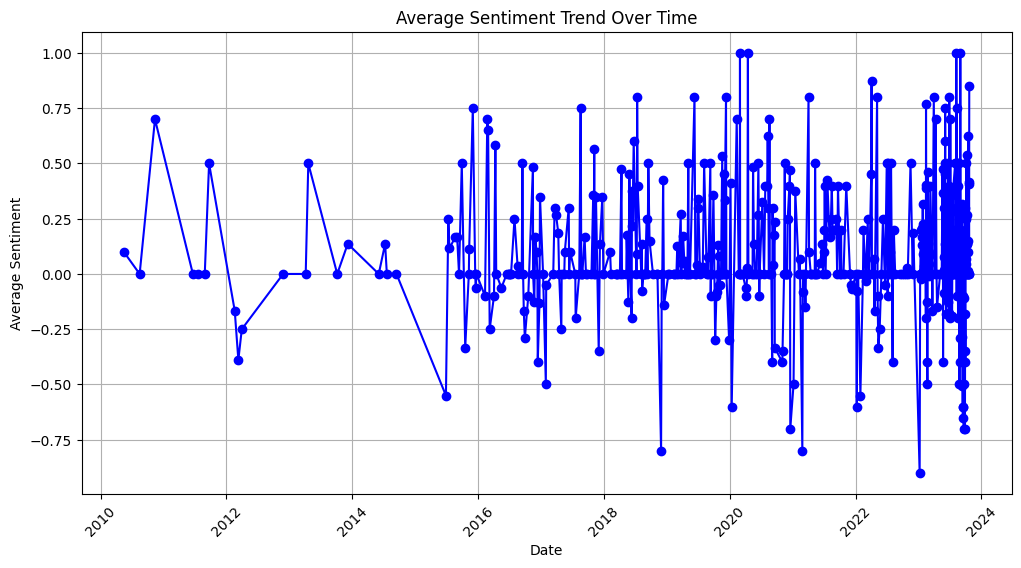

In [24]:
# Plot sentiment trend over time
plt.figure(figsize=(12, 6))
plt.plot(sentiment_by_day.index, sentiment_by_day.values, color='b', marker='o')
plt.title('Average Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 6. Sentiment Distribution

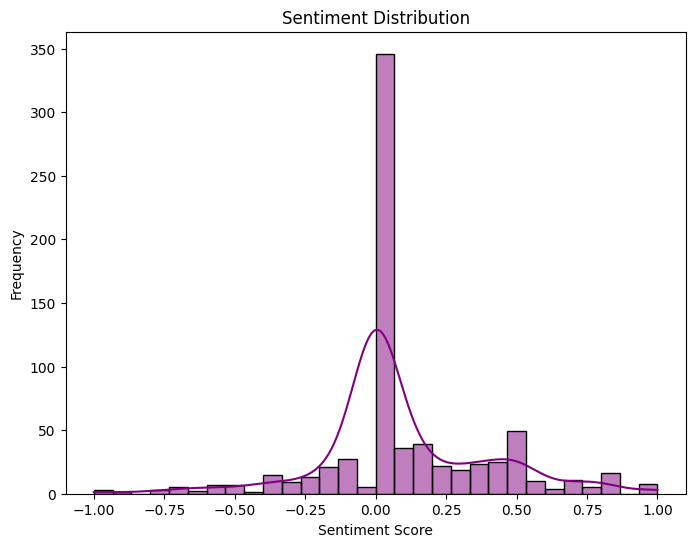

In [25]:
# Visualizing the overall distribution of sentiment scores
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment'], kde=True, color='purple', bins=30)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

### 7. Sentiment Trend by Hour of the Day

In [26]:
# Plot average sentiment by hour of the day
sentiment_by_hour = df.groupby('hour')['sentiment'].mean()

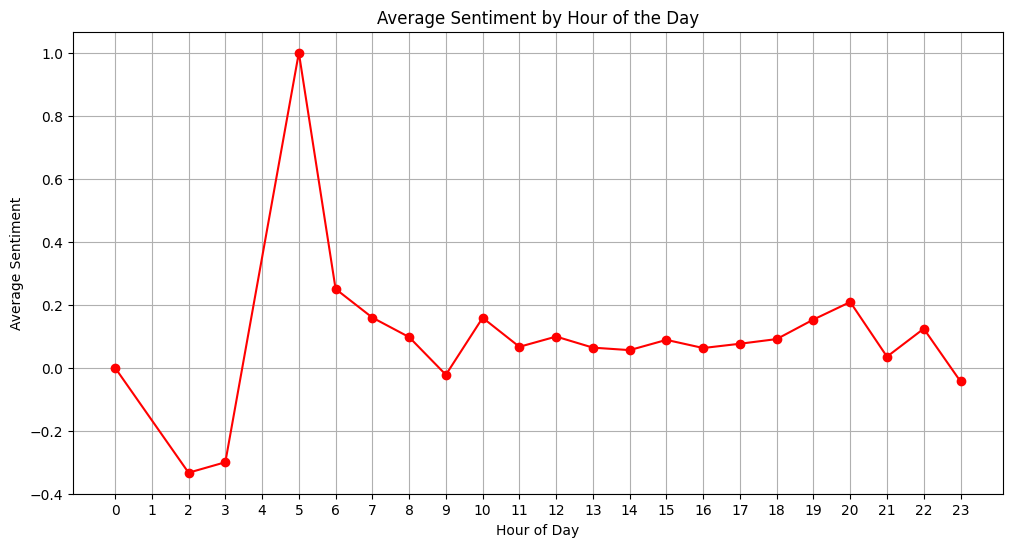

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(sentiment_by_hour.index, sentiment_by_hour.values, color='r', marker='o')
plt.title('Average Sentiment by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Sentiment')
plt.xticks(range(24))
plt.grid(True)
plt.show()

### 8. Advanced: Word Cloud of Positive and Negative Sentiments

In [28]:
from wordcloud import WordCloud

# Filter positive and negative tweets
positive_tweets = df[df['sentiment'] > 0]['cleaned_text']
negative_tweets = df[df['sentiment'] < 0]['cleaned_text']

In [29]:
# Create a word cloud for positive sentiment
positive_wordcloud = ' '.join(positive_tweets)
negative_wordcloud = ' '.join(negative_tweets)

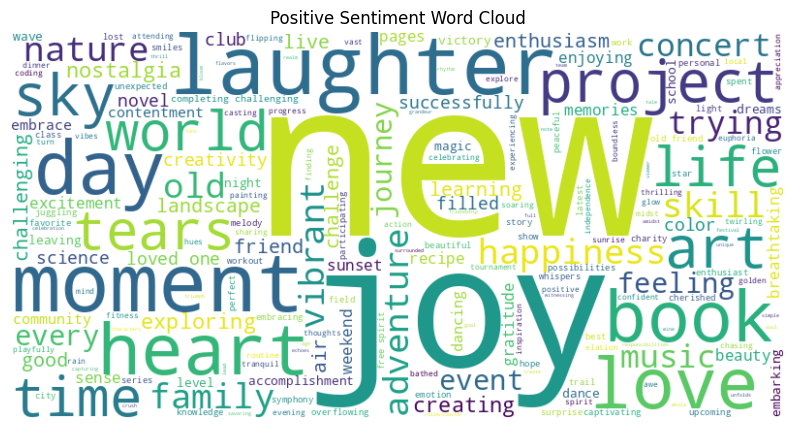

In [30]:
# Positive sentiment word cloud
plt.figure(figsize=(10, 6))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_wordcloud)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')
plt.show()

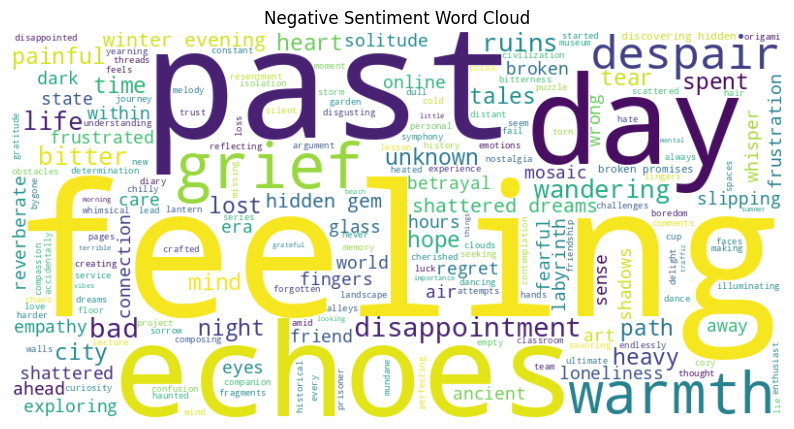

In [31]:
# Negative sentiment word cloud
plt.figure(figsize=(10, 6))
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_wordcloud)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')
plt.show()

### 9. Saving Processed Data (Optional)

In [32]:
df.to_csv('processed_sentiment_data.csv', index=False)